# Task 3

Find differentially expressed genes in breast cancer. Make plots for differential expression analysis similar to those in https://f1000research.com/articles/5-1408/v3.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

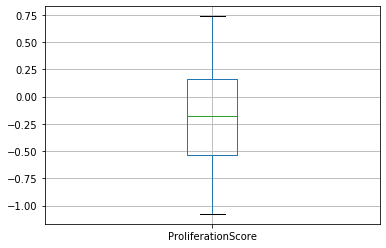

In [2]:
proliferation_df = pd.read_excel("data/1-s2.0-S0092867415011952-mmc2.xlsx").iloc[1:, :5]
proliferation_df.columns = proliferation_df.iloc[0]
proliferation_df = proliferation_df.drop(proliferation_df.index[0])
proliferation_df = proliferation_df[["Case.ID", "ProliferationScore"]]
proliferation_df["Case.ID"] = proliferation_df["Case.ID"].apply(lambda x: x + "-01")
proliferation_df["ProliferationScore"] = proliferation_df["ProliferationScore"].astype(float)
proliferation_df[["ProliferationScore"]].boxplot();

In [3]:
first_quartile = proliferation_df.quantile(q=0.25).values[0]
third_quartile = proliferation_df.quantile(q=0.75).values[0]

In [4]:
third_quartile_df = proliferation_df[proliferation_df["ProliferationScore"] >= third_quartile]
first_quartile_df = proliferation_df[proliferation_df["ProliferationScore"] <= first_quartile]

In [5]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter

In [6]:
with localconverter(ro.default_converter + pandas2ri.converter):
    r_third_quartile_df = ro.conversion.py2rpy(third_quartile_df)
    r_first_quartile_df = ro.conversion.py2rpy(first_quartile_df)
r_third_quartile_df.to_csvfile("data/proliferation_third_quartile_df.csv")
r_first_quartile_df.to_csvfile("data/proliferation_first_quartile_df.csv")

/Users/szalata/anaconda3/envs/ada/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:63: UserWarning: Error while trying to convert the column "Case.ID". Fall back to string conversion. The error is: module 'pandas' has no attribute 'NA'
  % (name, str(e)))


<rpy2.rinterface_lib.sexp.NULLType object at 0x113cacb90> [RTYPES.NILSXP]

Run task_3_differential_expression R script

<img src="img/filtering.png" alt="filtering" width="500"/>

<img src="img/normalization.png" alt="normalization" width="500"/>

<img src="img/sample_groups.png" alt="5A" width="500"/>

<img src="img/voom-mean-variance-trend.png" alt="5A" width="500"/>

<img src="img/mean_vs_sigma.png" alt="5A" width="500"/>

<img src="img/highvslow.png" alt="5A" width="500"/>

<img src="img/proliferation_heatmap.png" alt="5A" width="500"/>

top 100 genes